#Avence 3 Proyecto Inteligencia Arificial

* Jhon Danilo Rincón Maldonado
* Miguel Fernando Pardo Maldonado
* Andres Joan Pardo Alquchire



Configuración del dataset

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Monta tu Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Load the dataset
dataset_path = '/content/drive/MyDrive/inteligenciaArtificial1/proyectoIA/bitcoin_2017_to_2023.csv'
df = pd.read_csv(dataset_path)

# Convert the time column to datetime format and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to hourly data and apply rolling mean
df_hourly = df.resample('5H').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'})
df_hourly = df_hourly.rolling(window=10).mean().dropna()

#shift

# Split data into training and testing sets
train_data, test_data = train_test_split(df_hourly, test_size=0.2, random_state=42)

# K-means clustering
kmeans_silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    cluster_labels = kmeans.labels_
    silhouette_score_kmeans = silhouette_score(train_data, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_score_kmeans)

# Elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)

# DBSCAN clustering
eps = range(1, 21)
for e in eps:
    db = DBSCAN(eps=e, min_samples=5)
    db.fit(train_data)
    labels = db.labels_



Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Metodo Elbow, Kmeans y DBScan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

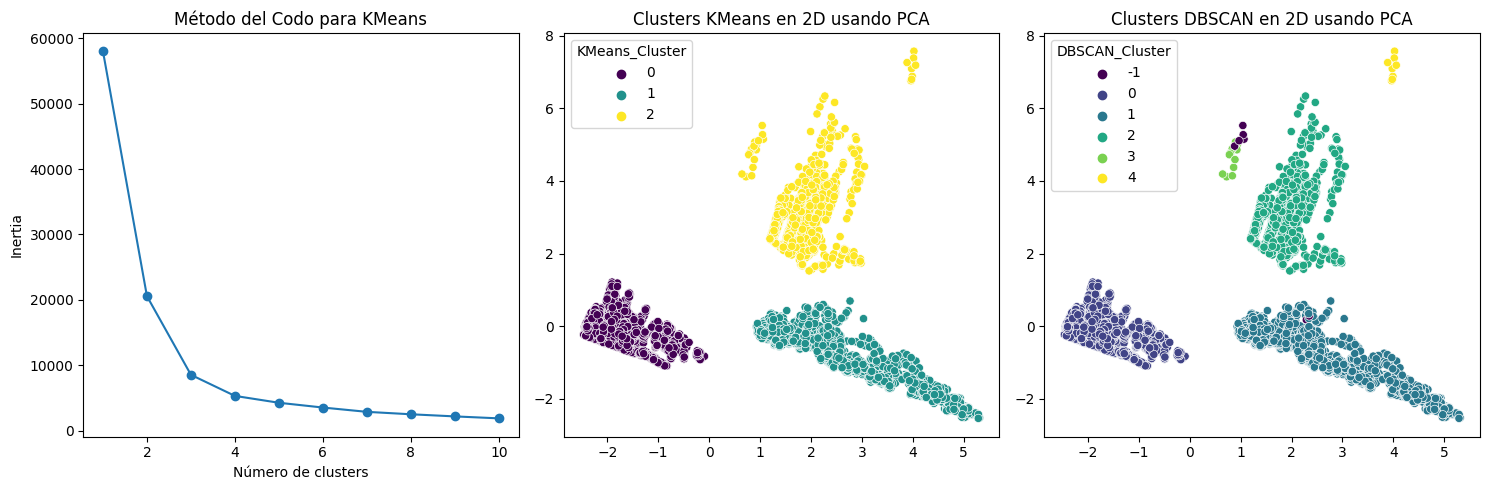

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Normalizar los datos
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo para KMeans
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')

# Aplicar KMeans con el número óptimo de clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
train_data['KMeans_Cluster'] = kmeans.fit_predict(train_data_scaled)

# Visualizar los clusters de KMeans en 2D usando PCA
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_scaled)

#frontensor slices

plt.subplot(132)
sns.scatterplot(x=train_data_pca[:, 0], y=train_data_pca[:, 1], hue=train_data['KMeans_Cluster'], palette='viridis')
plt.title('Clusters KMeans en 2D usando PCA')

# Aplicar DBSCAN para identificar outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_data['DBSCAN_Cluster'] = dbscan.fit_predict(train_data_scaled)

# Visualizar los clusters de DBSCAN en 2D usando PCA
plt.subplot(133)
sns.scatterplot(x=train_data_pca[:, 0], y=train_data_pca[:, 1], hue=train_data['DBSCAN_Cluster'], palette='viridis')
plt.title('Clusters DBSCAN en 2D usando PCA')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

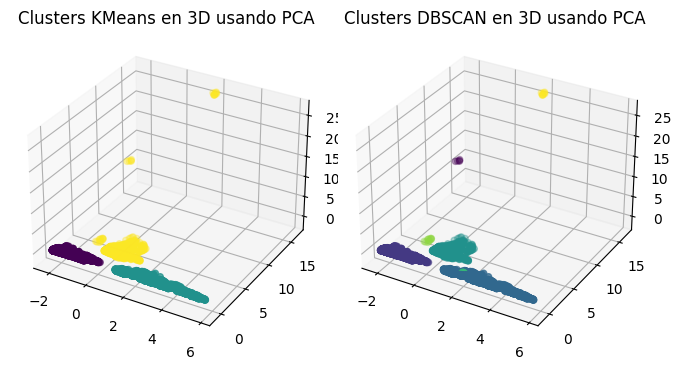

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Agrega esta importación para gráficos 3D
import seaborn as sns
from sklearn.model_selection import train_test_split

# Normalizar los datos
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data_scaled)
    inertia.append(kmeans.inertia_)


# Aplicar KMeans con el número óptimo de clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
train_data['KMeans_Cluster'] = kmeans.fit_predict(train_data_scaled)

# Visualizar los clusters de KMeans en 3D usando PCA
pca = PCA(n_components=3)
train_data_pca_kmeans = pca.fit_transform(train_data_scaled)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(132, projection='3d')  # Usa proyección 3D
ax.scatter(train_data_pca_kmeans[:, 0], train_data_pca_kmeans[:, 1], train_data_pca_kmeans[:, 2], c=train_data['KMeans_Cluster'], cmap='viridis')
ax.set_title('Clusters KMeans en 3D usando PCA')

# Aplicar DBSCAN para identificar outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_data['DBSCAN_Cluster'] = dbscan.fit_predict(train_data_scaled)

# Visualizar los clusters de DBSCAN en 3D usando PCA
ax = fig.add_subplot(133, projection='3d')  # Usa proyección 3D
train_data_pca_dbscan = pca.fit_transform(train_data_scaled)
ax.scatter(train_data_pca_dbscan[:, 0], train_data_pca_dbscan[:, 1], train_data_pca_dbscan[:, 2], c=train_data['DBSCAN_Cluster'], cmap='viridis')
ax.set_title('Clusters DBSCAN en 3D usando PCA')

plt.tight_layout()
plt.show()

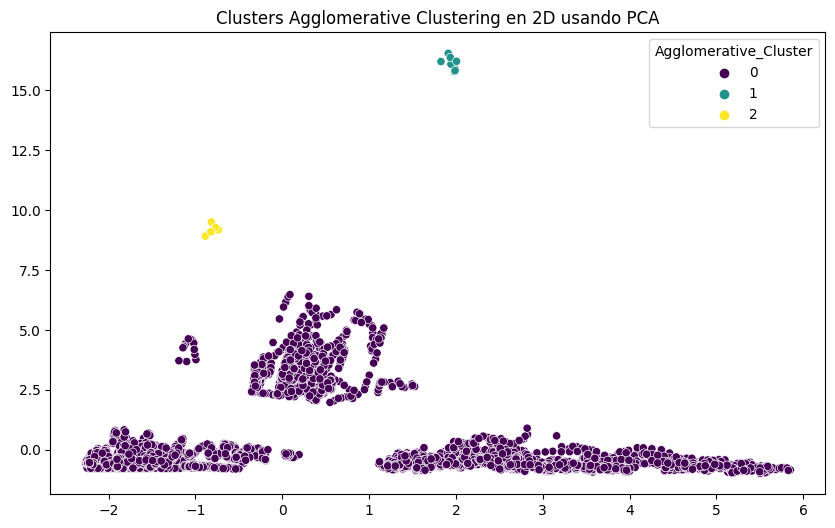

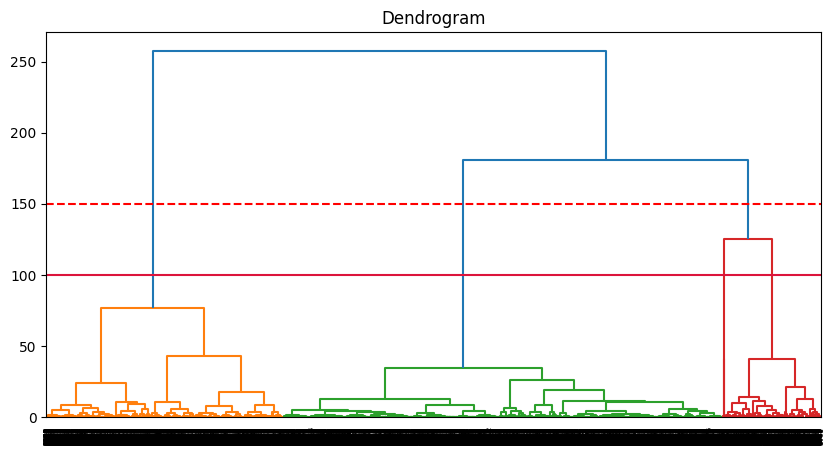

In [9]:
# Aplicar Agglomerative Clustering con el número óptimo de clusters
#linkage_methods = ['ward', 'complete', 'average', 'single']
optimal_clusters_agglomerative = 3
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters_agglomerative, linkage='complete')
train_data['Agglomerative_Cluster'] = agglomerative.fit_predict(train_data_scaled)

# Visualizar los clusters de Agglomerative Clustering en 2D usando PCA
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_scaled)


# Get the linkage matrix
clusters = hierarchy.linkage(train_data_scaled, method="ward")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data_pca[:, 0], y=train_data_pca[:, 1], hue=train_data['Agglomerative_Cluster'], palette='viridis')
plt.title('Clusters Agglomerative Clustering en 2D usando PCA')


# Visualize the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(150, color='red', linestyle='--')
plt.axhline(100, color='crimson')
plt.title('Dendrogram')
plt.show()

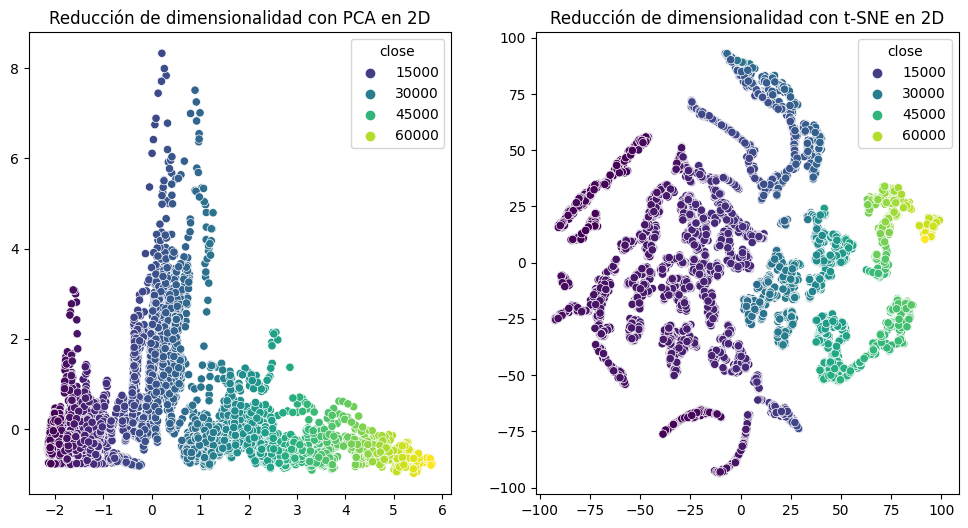

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_scaled)

# Aplicar t-SNE para reducción de dimensionalidad
tsne = TSNE(n_components=2, random_state=42)
train_data_tsne = tsne.fit_transform(train_data_scaled)

# Visualizar los datos reducidos en 2D con PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_data_pca[:, 0], y=train_data_pca[:, 1], hue=train_data['close'], palette='viridis')
plt.title('Reducción de dimensionalidad con PCA en 2D')

# Visualizar los datos reducidos en 2D con t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=train_data_tsne[:, 0], y=train_data_tsne[:, 1], hue=train_data['close'], palette='viridis')
plt.title('Reducción de dimensionalidad con t-SNE en 2D')

plt.show()
